# Food Subgroups

# Reusing the code from Exploration Phase. The code and comments will be updated as proceeded. The code and comments might not be perfect until finalized


In [1]:
# PCA section, Correlation, Heatmaps, can be seen to be the most important parts
# Might have to adjust/improve my conclusions from the plots in future work 

In [2]:
# Target variable ACR i.e. Albumin Creatinine Ratio
# Other Probable targets: Kidney failed, Systolic/Diastolic Pressure

# Tried the following Target variables previously that might not even be present now. Though might bring them back if seem to be important
# ESRD patients: Avg. Annual Mortality rates is given the most importance
# ESRD patients: Total (or %) deaths for target year
# Dialysis patients: Total (or %) deaths for target year

In [3]:
# For plotting, import libraries
from matplotlib import pyplot as plt
import matplotlib

# import seaborn as sns
%matplotlib inline
import pandas as pd


import numpy as np

from subprocess import check_output

from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns


In [4]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)


In [5]:
import os

#data_folder = './acr-data-for-analysis/food-subgroups/'
data_folder = './data-for-code/'

data_files = os.listdir(data_folder)
data_files

['average_intake_by_food_subgroups_demo_acr_kidney_blood_pressure.xlsx',
 'food-subgroups-subgroup-names-on-columns.csv',
 'more-col-recom-amt-2015-2016-consolidated-food-group-based-data-with-acr-and-blood-pressure.xlsx',
 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx',
 'regression_variables_after_pca_saved_for_factor_transformations.csv',
 'regression_variables_after_pca_saved_for_factor_transformations_food_subgroup.csv',
 'transformed_regression_variables_after_pca_saved_for_factor_transformations.csv']

In [6]:
data_file = data_folder + 'average_intake_by_food_subgroups_demo_acr_kidney_blood_pressure.xlsx'
excel_file = pd.ExcelFile(data_file)

In [7]:
# see all sheet names
sheet_names = excel_file.sheet_names  
sheet_names[:4]

['Sheet1']

In [8]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

foodgroup_acr_data_df = excel_file.parse('Sheet1')
foodgroup_acr_data_df.head(5)

,participant_id,participant_age,gender,food_group_name,avg_food_weight_in_gms,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,m_food_group_name,a_sample_food_code,a_sample_food,a_sample_food_name,food_group_id,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
0,83732,62,1,Added Sugars/Sugars and sweets,3.00,6.1,2.0,128.0,70.0,10.5,0.03,13.0,2.67,2.555,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,"Sugars, sweets, and beverages",91200040,"Sugar substitute, saccharin, powder","SUGAR SUBSTITUTE, SACCHARIN, P",16,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
1,83732,62,1,"Citrus fruits, juices",192.00,6.1,2.0,128.0,70.0,90.0,1.81,0.0,22.56,17.950,4.6,0.23,0.029,0.044,0.048,0.0,77.0,27.0,19.0,348.0,0.0,Fruits,61119010,"Orange, raw","ORANGE, RAW",7,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
2,83732,62,1,Dark-green vegetables,76.50,6.1,2.0,128.0,70.0,20.0,1.95,217.0,3.43,1.070,1.5,0.36,0.009,0.083,0.035,0.0,90.0,32.0,10.0,123.0,0.0,Vegetables,72122213,"Mustard greens, cooked, from canned, fat not a...","MUSTARD GREENS, COOKED, FROM C",1,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
3,83732,62,1,"Meat, Poultry and Eggs subgroup",154.58,6.1,2.0,128.0,70.0,629.0,41.53,1620.0,48.67,7.960,1.6,37.24,14.511,16.936,4.167,153.0,146.0,314.0,39.0,525.0,0.0,Protein,27564060,"Ham, smoked or cured, cooked, lean only eaten","HAM, SMOKED OR CURED, COOKED,",12,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
4,83732,62,1,Milks and milk drinks,488.00,6.1,2.0,128.0,70.0,298.0,15.37,210.0,23.42,24.640,0.0,15.86,9.101,3.963,0.952,49.0,551.0,410.0,49.0,644.0,0.0,Dairy,11111000,"Milk, whole","MILK, WHOLE",11,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN


In [9]:
foodgroup_acr_data_df.describe()

,participant_id,participant_age,gender,avg_food_weight_in_gms,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,food_group_id,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
count,81851.000000,81851.000000,81851.000000,81851.000000,79431.000000,54616.000000,70143.000000,70143.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,81851.000000,8.185100e+04,81851.000000,79431.000000,79431.000000,79431.000000,79431.000000,2345.000000,54616.000000,5952.000000,51799.000000,16930.000000,51799.000000,12427.000000,51799.000000,12952.000000,51799.000000,5211.000000,20417.000000,51799.000000,0.0
mean,88765.502792,37.204396,1.520910,182.475372,43.541154,1.965010,120.935261,66.253596,194.294007,7.672544,328.147167,23.115997,10.632527,1.692968,8.359074,2.843839,2.952946,1.989087,33.044192,96.026787,132.073981,26.959711,247.138617,0.583392,6.025554e+07,9.962432,42.593749,42.593749,10405.219315,117.706101,1.962047,1.906401,1.870968,1.745845,1.400827,1.770497,1.955661,1.757254,1.910593,1.908859,2.387642,1.503600,1.290604,NaN
std,2866.381376,23.854176,0.499566,313.585556,363.440634,0.311991,18.643196,14.144801,233.361150,13.474023,529.019466,28.792244,17.022355,2.873026,12.827787,4.913074,4.887655,3.595024,83.911721,162.209889,186.306319,34.580800,297.634897,6.151203,2.734175e+07,5.296842,279.444931,279.444931,6980.616879,78.966254,0.547108,0.455942,0.484494,1.251256,0.758358,0.509981,1.037234,0.492143,1.001368,0.398139,1.192665,0.880218,1.201748,NaN
min,83732.000000,3.000000,1.000000,0.030000,0.220000,1.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.110000e+07,1.000000,0.210000,0.210000,312.900000,3.540000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,86279.000000,14.000000,1.000000,40.500000,5.210000,2.000000,108.000000,58.000000,44.000000,0.300000,15.000000,2.080000,0.470000,0.000000,0.170000,0.017000,0.015000,0.032000,0.000000,9.000000,12.000000,6.000000,41.500000,0.000000,3.213103e+07,7.000000,4.500000,4.500000,5038.800000,57.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,NaN
50%,88814.000000,35.000000,2.000000,103.000000,8.190000,2.000000,118.000000,66.000000,122.000000,2.240000,121.000000,14.310000,4.090000,0.500000,3.260000,0.875000,0.960000,0.376000,0.000000,32.000000,59.000000,16.000000,157.000000,0.000000,6.310701e+07,11.000000,8.700000,8.700000,9105.200000,103.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,NaN
75%,91231.000000,58.000000,2.000000,215.410000,15.760000,2.000000,130.000000,76.000000,260.000000,8.600000,419.000000,33.340000,14.430000,2.300000,11.520000,3.653000,3.946500,2.537000,26.000000,110.000000,185.500000,35.000000,352.000000,0.000000,8.311400e+07,16.000000,17.400000,17.400000,14055.600000,159.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,NaN
max,93702.000000,80.000000,2.000000,9600.000000,21152.170000,9.000000,236.000000,120.000000,4100.000000,247.640000,8868.000000,876.960000,609.250000,60.600000,26

# PCA: Apply PCA to find important features

In [10]:
#foodgroup_acr_data_df['food_group_id']

In [11]:
df_food_group_only = foodgroup_acr_data_df[ ['participant_id',  'food_group_name', 'avg_food_weight_in_gms'] ]
df_food_group_only.head()

#df_food_group_only.T

df_food_group_only_index = df_food_group_only.set_index(['participant_id', 'food_group_name'])
df_food_group_only_index

df_food_group_only_index_unstack = df_food_group_only_index.unstack()

df_food_group_only_index_unstack.head()

avg_food_weight_in_gms                      \
food_group_name Added Sugars/Sugars and sweets Alcoholic beverages   
participant_id                                                       
83732                                     3.00                 NaN   
83733                                     7.29              1740.0   
83734                                      NaN                 NaN   
83735                                    10.67                 NaN   
83736                                   188.38                 NaN   

                                                                          \
food_group_name Citrus fruits, juices Dark-green vegetables Dried fruits   
participant_id                                                             
83732                           192.0                  76.5          NaN   
83733                             NaN                   NaN          NaN   
83734                             NaN                   NaN          NaN   
83735                             NaN                   NaN          NaN   
83736                            96.0                   NaN          NaN   

                                                           \
food_group_name Fruit juices and nectars excluding citrus   
participant_id                                              
83732                                                 NaN   
83733                                                 NaN   
83734                                                 NaN   
83735                                                 NaN   
83736                                                 NaN   

                                                                             \
food_group_name Fruits and juices baby food Meat, Poultry and Eggs subgroup   
participant_id                                                                
83732                                   NaN                          154.58   
83733                                   NaN                           91.00   
83734                                   NaN                          121.12   
83735                                   NaN                          242.00   
83736                                   NaN                           64.50   

                                                                       \
food_group_name Milk desserts, sauces, gravies Milks and milk drinks    
participant_id                                                          
83732                                      NaN                  488.0   
83733                                      NaN                    NaN   
83734                                      NaN                  526.0   
83735                                      NaN                    NaN   
83736                                      NaN                    NaN   

                                                                            \
food_group_name Nonalcoholic beverages Nuts, Seeds, and Soy Products  Oils   
participant_id                                                               
83732                           484.88                           NaN  14.0   
83733                           465.00                           NaN   NaN   
83734                           380.75                           NaN  14.7   
83735                           375.00                           NaN   NaN   
83736                           286.75                           NaN   NaN   

                                                       \
food_group_name Other fruits Other vegetables Protein   
participant_id                                          
83732                 202.00            47.17     NaN   
83733                    NaN            94.84     NaN   
83734                 350.33           100.53   100.0   
83735                    NaN              NaN     NaN   
83736                  79.25              NaN     NaN   

                                                                 

In [12]:
foodgroup_acr_data_df.columns

df_without_food_groups = foodgroup_acr_data_df.drop(['food_group_name', 'food_group_id', 'avg_food_weight_in_gms'], axis=1)
df_without_food_groups.head()

df_without_food_groups_one_entry = df_without_food_groups.groupby(['participant_id']).mean()
df_without_food_groups_one_entry.head()

,participant_age,gender,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,62.0,1.0,6.10,2.0,128.0,70.0,180.535714,7.076071,373.095238,21.851429,9.727857,2.142857,9.003571,3.101536,3.288893,2.213000,38.214286,105.785714,116.321429,23.885714,283.107143,0.000,6.688853e+07,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83733,53.0,1.0,12.82,2.0,146.0,88.0,426.150000,14.013500,520.400000,41.914000,18.230000,1.050000,15.507000,4.466550,4.858250,4.115450,78.600000,67.200000,243.400000,40.050000,372.600000,9.485,6.794540e+07,23.2,23.2,16000.4,181.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83734,78.0,1.0,150.00,1.0,138.0,46.0,244.833333,10.078333,429.944444,33.246667,10.235417,3.491667,9.046250,3.549708,2.888833,2.600958,50.416667,125.680556,157.708333,46.861111,453.208333,0.000,6.143687e+07,105.0,105.0,6188.0,70.0,2.0,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN
83735,56.0,2.0,5.69,2.0,132.0,72.0,155.875000,8.677500,286.125000,17.962500,5.620000,1.687500,5.801250,2.003750,2.185750,1.188000,17.250000,158.125000,172.125000,37.625000,262.750000,0.000,6.273985e+07,5.8,5.8,9016.8,102.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,1.0,NaN
83736,42.0,2.0,15.11,2.0,100.0,70.0,129.375000,3.025000,194.125000,17.573750,9.576875,0.575000,5.456250,2.410125,1.825000,0.607250,19.625000,16.000000,44.687500,8.000000,93.312500,0.000,6.810922e+07,47.6,47.6,27846.0,315.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,NaN


In [13]:
merged = df_food_group_only_index_unstack.merge(df_without_food_groups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape
merged.head()


,"(avg_food_weight_in_gms, Added Sugars/Sugars and sweets)","(avg_food_weight_in_gms, Alcoholic beverages)","(avg_food_weight_in_gms, Citrus fruits, juices)","(avg_food_weight_in_gms, Dark-green vegetables)","(avg_food_weight_in_gms, Dried fruits)","(avg_food_weight_in_gms, Fruit juices and nectars excluding citrus)","(avg_food_weight_in_gms, Fruits and juices baby food)","(avg_food_weight_in_gms, Meat, Poultry and Eggs subgroup)","(avg_food_weight_in_gms, Milk desserts, sauces, gravies)","(avg_food_weight_in_gms, Milks and milk drinks )","(avg_food_weight_in_gms, Nonalcoholic beverages)","(avg_food_weight_in_gms, Nuts, Seeds, and Soy Products)","(avg_food_weight_in_gms, Oils)","(avg_food_weight_in_gms, Other fruits)","(avg_food_weight_in_gms, Other vegetables)","(avg_food_weight_in_gms, Protein)","(avg_food_weight_in_gms, Red and orange vegetables)","(avg_food_weight_in_gms, Refined grains)","(avg_food_weight_in_gms, Seafood)","(avg_food_weight_in_gms, Solid Fats)","(avg_food_weight_in_gms, Starchy vegetables)","(avg_food_weight_in_gms, Water, noncarbonated)","(avg_food_weight_in_gms, Whole grains)",participant_age,gender,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,3.00,NaN,192.0,76.5,NaN,NaN,NaN,154.58,NaN,488.0,484.88,NaN,14.0,202.00,47.17,NaN,NaN,37.37,NaN,15.79,187.5,280.0,150.74,62.0,1.0,6.10,2.0,128.0,70.0,180.535714,7.076071,373.095238,21.851429,9.727857,2.142857,9.003571,3.101536,3.288893,2.213000,38.214286,105.785714,116.321429,23.885714,283.107143,0.000,6.688853e+07,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83733,7.29,1740.0,NaN,NaN,NaN,NaN,NaN,91.00,NaN,NaN,465.00,NaN,NaN,NaN,94.84,NaN,NaN,270.60,453.0,14.19,NaN,493.5,64.00,53.0,1.0,12.82,2.0,146.0,88.0,426.150000,14.013500,520.400000,41.914000,18.230000,1.050000,15.507000,4.466550,4.858250,4.115450,78.600000,67.200000,243.400000,40.050000,372.600000,9.485,6.794540e+07,23.2,23.2,16000.4,181.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.12,NaN,526.0,380.75,NaN,14.7,350.33,100.53,100.0,NaN,78.00,NaN,13.46,255.0,530.0,81.00,78.0,1.0,150.00,1.0,138.0,46.0,244.833333,10.078333,429.944444,33.246667,10.235417,3.491667,9.046250,3.549708,2.888833,2.600958,50.416667,125.680556,157.708333,46.861111,453.208333,0.000,6.143687e+07,105.0,105.0,6188.0,70.0,2.0,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN
83735,10.67,NaN,NaN,NaN,NaN,NaN,NaN,242.00,NaN,NaN,375.00,NaN,NaN,NaN,NaN,NaN,NaN,21.00,NaN,15.50,89.3,180.0,89.30,56.0,2.0,5.69,2.0,132.0,72.0,155.875000,8.677500,286.125000,17.962500,5.620000,1.687500,5.801250,2.003750,2.185750,1.188000,17.250000,158.125000,172.125000,37.625000,262.750000,0.000,6.273985e+07,5.8,5.8,9016.8,102.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,1.0,NaN
83736,188.38,NaN,96.0,NaN,NaN,NaN,NaN,64.50,NaN,NaN,286.75,NaN,NaN,79.25,NaN,NaN,NaN,NaN,NaN,28.38,6.0,NaN,158.00,42.0,2.0,15.11,2.0,100.0,70.0,129.375000,3.025000,194.125000,17.573750,9.576875,0.575000,5.456250,2.410125,1.825000,0.607250,19.625000,16.000000,44.687500,8.000000,93.312500,0.000,6.810922e+07,47.6,47.6,27846.0,315.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,NaN


In [14]:
# remove extra spaces in the column names
column_dict = {}
for aName in merged.columns:
    #print(aName)
    try:
        #if ( aName.index( 'avg_food_weight_in_gms' ) >= 0):
        if 'avg_food_weight_in_gms' in aName:
            #aName = 
            column_dict[aName] = aName[1] #aName.strip()
        else:
            column_dict[aName] = aName #.strip()
        
    except:
        print(aName)
        continue

# column_dict

In [15]:
merged = merged.rename(index=str, columns=column_dict)
merged.head()

,Added Sugars/Sugars and sweets,Alcoholic beverages,"Citrus fruits, juices",Dark-green vegetables,Dried fruits,Fruit juices and nectars excluding citrus,Fruits and juices baby food,"Meat, Poultry and Eggs subgroup","Milk desserts, sauces, gravies",Milks and milk drinks,Nonalcoholic beverages,"Nuts, Seeds, and Soy Products",Oils,Other fruits,Other vegetables,Protein,Red and orange vegetables,Refined grains,Seafood,Solid Fats,Starchy vegetables,"Water, noncarbonated",Whole grains,participant_age,gender,acr,kidney_failed,systolic_pressure,diastolic_pressure,calorie,protein,sodium,carbohydrate,sugar,fibre,fat,saturated_fat,mono_fat,poly_fat,cholesterol,calcium,phosphorous,magnesium,potassium,alcohol,a_sample_food_code,albumin_urine_mu_g,albumin_urine_mg,creatinine_mu_mol,creatinine_mg,received_dialysis_in_12_months,kidney_stones,passed_kidney_stones_12_months,urinary_leakage_frequency,urine_lose_each_time,leak_during_activities,how_frequent_leak_occurs,urinated_before_reaching_toilet,how_frequent,leak_during_nonphysical_activities,how_frequest_leak_nonphysical,how_much_leak_bothering,how_much_daily_activities_affected,count_night_time_urinate
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83732,3.00,NaN,192.0,76.5,NaN,NaN,NaN,154.58,NaN,488.0,484.88,NaN,14.0,202.00,47.17,NaN,NaN,37.37,NaN,15.79,187.5,280.0,150.74,62.0,1.0,6.10,2.0,128.0,70.0,180.535714,7.076071,373.095238,21.851429,9.727857,2.142857,9.003571,3.101536,3.288893,2.213000,38.214286,105.785714,116.321429,23.885714,283.107143,0.000,6.688853e+07,2.5,2.5,3624.4,41.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83733,7.29,1740.0,NaN,NaN,NaN,NaN,NaN,91.00,NaN,NaN,465.00,NaN,NaN,NaN,94.84,NaN,NaN,270.60,453.0,14.19,NaN,493.5,64.00,53.0,1.0,12.82,2.0,146.0,88.0,426.150000,14.013500,520.400000,41.914000,18.230000,1.050000,15.507000,4.466550,4.858250,4.115450,78.600000,67.200000,243.400000,40.050000,372.600000,9.485,6.794540e+07,23.2,23.2,16000.4,181.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,0.0,NaN
83734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.12,NaN,526.0,380.75,NaN,14.7,350.33,100.53,100.0,NaN,78.00,NaN,13.46,255.0,530.0,81.00,78.0,1.0,150.00,1.0,138.0,46.0,244.833333,10.078333,429.944444,33.246667,10.235417,3.491667,9.046250,3.549708,2.888833,2.600958,50.416667,125.680556,157.708333,46.861111,453.208333,0.000,6.143687e+07,105.0,105.0,6188.0,70.0,2.0,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN
83735,10.67,NaN,NaN,NaN,NaN,NaN,NaN,242.00,NaN,NaN,375.00,NaN,NaN,NaN,NaN,NaN,NaN,21.00,NaN,15.50,89.3,180.0,89.30,56.0,2.0,5.69,2.0,132.0,72.0,155.875000,8.677500,286.125000,17.962500,5.620000,1.687500,5.801250,2.003750,2.185750,1.188000,17.250000,158.125000,172.125000,37.625000,262.750000,0.000,6.273985e+07,5.8,5.8,9016.8,102.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,1.0,NaN
83736,188.38,NaN,96.0,NaN,NaN,NaN,NaN,64.50,NaN,NaN,286.75,NaN,NaN,79.25,NaN,NaN,NaN,NaN,NaN,28.38,6.0,NaN,158.00,42.0,2.0,15.11,2.0,100.0,70.0,129.375000,3.025000,194.125000,17.573750,9.576875,0.575000,5.456250,2.410125,1.825000,0.607250,19.625000,16.000000,44.687500,8.000000,93.312500,0.000,6.810922e+07,47.6,47.6,27846.0,315.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,NaN


In [16]:
merged_f = merged.fillna(0)
merged_f.to_csv(data_folder + 'food-subgroups-subgroup-names-on-columns.csv')

In [17]:
regr_data = pd.read_csv(data_folder + 'regression_variables_after_pca_saved_for_factor_transformations.csv')
regr_data_t = regr_data.T
regr_data_t.to_csv(data_folder + 'transformed_regression_variables_after_pca_saved_for_factor_transformations.csv')


In [18]:
merged.columns

Index(['Added Sugars/Sugars and sweets', 'Alcoholic beverages',
       'Citrus fruits, juices', 'Dark-green vegetables', 'Dried fruits',
       'Fruit juices and nectars excluding citrus',
       'Fruits and juices baby food', 'Meat, Poultry and Eggs subgroup',
       'Milk desserts, sauces, gravies', 'Milks and milk drinks ',
       'Nonalcoholic beverages', 'Nuts, Seeds, and Soy Products', 'Oils',
       'Other fruits', 'Other vegetables', 'Protein',
       'Red and orange vegetables', 'Refined grains', 'Seafood', 'Solid Fats',
       'Starchy vegetables', 'Water, noncarbonated', 'Whole grains',
       'participant_age', 'gender', 'acr', 'kidney_failed',
       'systolic_pressure', 'diastolic_pressure', 'calorie', 'protein',
       'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat', 'saturated_fat',
       'mono_fat', 'poly_fat', 'cholesterol', 'calcium', 'phosphorous',
       'magnesium', 'potassium', 'alcohol', 'a_sample_food_code',
       'albumin_urine_mu_g', 'albumin_urine_mg', '

In [19]:
merged.columns

Index(['Added Sugars/Sugars and sweets', 'Alcoholic beverages',
       'Citrus fruits, juices', 'Dark-green vegetables', 'Dried fruits',
       'Fruit juices and nectars excluding citrus',
       'Fruits and juices baby food', 'Meat, Poultry and Eggs subgroup',
       'Milk desserts, sauces, gravies', 'Milks and milk drinks ',
       'Nonalcoholic beverages', 'Nuts, Seeds, and Soy Products', 'Oils',
       'Other fruits', 'Other vegetables', 'Protein',
       'Red and orange vegetables', 'Refined grains', 'Seafood', 'Solid Fats',
       'Starchy vegetables', 'Water, noncarbonated', 'Whole grains',
       'participant_age', 'gender', 'acr', 'kidney_failed',
       'systolic_pressure', 'diastolic_pressure', 'calorie', 'protein',
       'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat', 'saturated_fat',
       'mono_fat', 'poly_fat', 'cholesterol', 'calcium', 'phosphorous',
       'magnesium', 'potassium', 'alcohol', 'a_sample_food_code',
       'albumin_urine_mu_g', 'albumin_urine_mg', '

In [20]:
df_drop_pca = merged[
    
    [  'Added Sugars/Sugars and sweets', 
       'Alcoholic beverages',
       'Citrus fruits, juices', 
       'Dark-green vegetables', 
       'Dried fruits',
       'Fruit juices and nectars excluding citrus',
       'Fruits and juices baby food', 
       'Meat, Poultry and Eggs subgroup',
       'Milk desserts, sauces, gravies', 
       'Milks and milk drinks ',
       'Nonalcoholic beverages', 
       'Nuts, Seeds, and Soy Products', 'Oils',
       'Other fruits', 
       'Other vegetables', 
       'Protein',
       'Red and orange vegetables', 
       'Refined grains', 
       'Seafood', 
       'Solid Fats',
       'Starchy vegetables', 
       'Water, noncarbonated', 
       'Whole grains',
       #'participant_age', 
       #'gender', 
       #'acr', 
       #'kidney_failed',
       #'systolic_pressure', 
       #'diastolic_pressure', 
       #'calorie', 
       #'protein',
       #'sodium', 
       #'carbohydrate', 
       #'sugar', 
       #'fibre', 
       #'fat', 
       #'saturated_fat',
       #'mono_fat', 
       #'poly_fat', 
       #'cholesterol', 
       #'calcium', 
       #'phosphorous',
       #'magnesium', 
       #'potassium', 
       #'alcohol', 
     
       #'a_sample_food_code',
       #'albumin_urine_mu_g', 'albumin_urine_mg', 'creatinine_mu_mol',
       #'creatinine_mg', 'received_dialysis_in_12_months', 'kidney_stones',
       #'passed_kidney_stones_12_months', 'urinary_leakage_frequency',
       #'urine_lose_each_time', 'leak_during_activities',
       #'how_frequent_leak_occurs', 'urinated_before_reaching_toilet',
       #'how_frequent', 'leak_during_nonphysical_activities',
       #'how_frequest_leak_nonphysical', 'how_much_leak_bothering',
       #'how_much_daily_activities_affected', 'count_night_time_urinate'
    ]

    
]

In [21]:
# removing text features and/or not that important features
#foodgroup_acr_data_df
#df_drop_pca = merged #.drop([ 'food_group_from_recom_amount', 'm_food_group_name', 'a_sample_food', 'a_sample_food_name'], axis=1)
#df_drop_pca = df_drop_pca.drop(['acr'], axis=1)
# 'participant_age', 'gender',
df_drop_pca.fillna(0, inplace=True)

df_drop_pca.head(10)

,Added Sugars/Sugars and sweets,Alcoholic beverages,"Citrus fruits, juices",Dark-green vegetables,Dried fruits,Fruit juices and nectars excluding citrus,Fruits and juices baby food,"Meat, Poultry and Eggs subgroup","Milk desserts, sauces, gravies",Milks and milk drinks,Nonalcoholic beverages,"Nuts, Seeds, and Soy Products",Oils,Other fruits,Other vegetables,Protein,Red and orange vegetables,Refined grains,Seafood,Solid Fats,Starchy vegetables,"Water, noncarbonated",Whole grains
participant_id,,,,,,,,,,,,,,,,,,,,,,,
83732,3.00,0.0,192.0,76.5,0.0,0.0,0.0,154.58,0.0,488.00,484.88,0.0,14.00,202.00,47.17,0.00,0.0,37.37,0.0,15.79,187.5,280.0,150.74
83733,7.29,1740.0,0.0,0.0,0.0,0.0,0.0,91.00,0.0,0.00,465.00,0.0,0.00,0.00,94.84,0.00,0.0,270.60,453.0,14.19,0.0,493.5,64.00
83734,0.00,0.0,0.0,0.0,0.0,0.0,0.0,121.12,0.0,526.00,380.75,0.0,14.70,350.33,100.53,100.00,0.0,78.00,0.0,13.46,255.0,530.0,81.00
83735,10.67,0.0,0.0,0.0,0.0,0.0,0.0,242.00,0.0,0.00,375.00,0.0,0.00,0.00,0.00,0.00,0.0,21.00,0.0,15.50,89.3,180.0,89.30
83736,188.38,0.0,96.0,0.0,0.0,0.0,0.0,64.50,0.0,0.00,286.75,0.0,0.00,79.25,0.00,0.00,0.0,0.00,0.0,28.38,6.0,0.0,158.00
83737,7.06,0.0,76.0,0.0,0.0,0.0,0.0,136.00,0.0,244.00,240.00,0.0,5.21,0.00,197.50,77.00,0.0,68.00,0.0,21.00,0.0,399.4,78.00
83738,0.00,0.0,88.0,0.0,0.0,0.0,0.0,239.00,0.0,167.75,0.00,0.0,0.00,364.00,21.66,0.00,0.0,41.75,0.0,21.00,0.0,247.5,166.25
83739,14.77,0.0,0.0,0.0,0.0,108.5,0.0,50.19,0.0,106.75,124.00,56.0,0.00,72.72,0.00,76.25,0.0,43.36,0.0,11.04,0.0,360.0,28.00
83741,50.00,0.0,0.0,195.0,0.0,356.5,0.0,260.00,0.0,274.50,240.00,0.0,4.90,0.00,92.00,0.00,0.0,113.56,0.0,30.00,250.0,578.0,191.77


In [22]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_drop_pca)
standardisedX = pd.DataFrame(standardisedX, index=df_drop_pca.index, columns=df_drop_pca.columns)
standardisedX.apply(np.mean)

Added Sugars/Sugars and sweets               2.091783e-16
Alcoholic beverages                          3.822242e-16
Citrus fruits, juices                        1.694832e-17
Dark-green vegetables                        9.322008e-16
Dried fruits                                 1.785011e-15
Fruit juices and nectars excluding citrus   -2.310308e-16
Fruits and juices baby food                  7.944569e-16
Meat, Poultry and Eggs subgroup             -8.868298e-17
Milk desserts, sauces, gravies              -3.878713e-16
Milks and milk drinks                       -1.797387e-16
Nonalcoholic beverages                       6.543493e-17
Nuts, Seeds, and Soy Products                1.522320e-16
Oils                                         9.512190e-16
Other fruits                                -2.575567e-16
Other vegetables                            -3.786687e-17
Protein                                      1.673196e-16
Red and orange vegetables                   -3.572561e-16
Refined grains

In [23]:
standardisedX.apply(np.std)
from sklearn import decomposition
#pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [25]:
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.229856,0.065763,0.065763
PC2,1.161816,0.058688,0.124451
PC3,1.105082,0.053096,0.177547
PC4,1.074889,0.050234,0.227781
PC5,1.041649,0.047175,0.274956
PC6,1.013388,0.044650,0.319606
PC7,1.004753,0.043893,0.363499
PC8,1.004013,0.043828,0.407327
PC9,0.997678,0.043277,0.450603


# First 22 components can define  83%, 26 Comp over 90% 

In [26]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('pca_components_variance' + '.png')            
    plt.show()

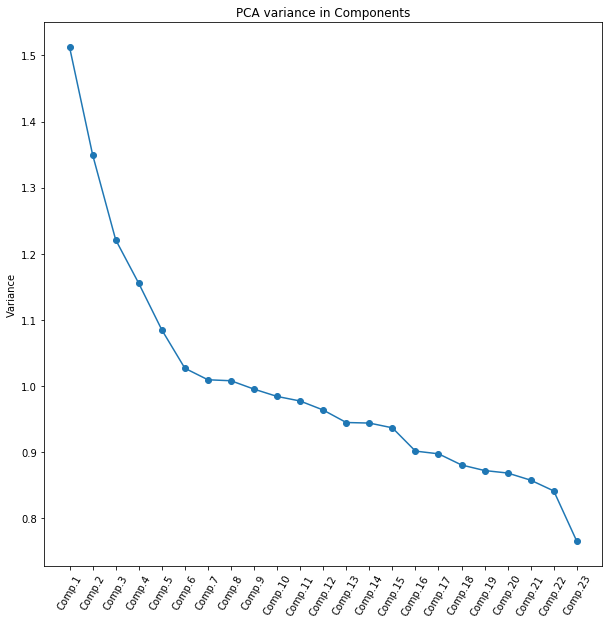

<Figure size 720x720 with 0 Axes>

In [27]:
plt.rcParams['figure.figsize'] = 10, 10
screeplot(pca, standardisedX)
plt.savefig('./images/pca_components_variance_food_subgroup' + '.png')            



# comp 3 to comp 4 is the most change - slope
# first three can be retained

Other big slope changes at:5 to 6, 8 to 9, 25 to 26, 30 to 31

Though upto 3 can be significant, upto 26 can be experimented with, or even just upto 8

just upto 8 is preferred


In [28]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [29]:
calcpc(standardisedX, pca.components_[0])

array([ 0.4024334 ,  2.86288165,  0.63548882, ..., -0.27547279,
       -0.40052422,  0.01408633])

In [30]:
pca.transform(standardisedX)[:, 0]

array([ 0.4024334 ,  2.86288165,  0.63548882, ..., -0.27547279,
       -0.40052422,  0.01408633])

In [31]:
pca.components_[1]

array([-0.04013536, -0.21662898,  0.2646046 ,  0.2096937 ,  0.15558643,
        0.23267299, -0.01198426, -0.10661167,  0.24079041,  0.30859506,
       -0.15275508,  0.22375509,  0.14752615,  0.45938378,  0.30101746,
        0.23534633,  0.25186201,  0.19465321,  0.16763907,  0.08938424,
        0.06329616,  0.01186119, -0.02546397])

In [32]:
np.sum(pca.components_[1]**2)

1.0000000000000004

In [33]:
# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work
#df_drop_pca['acr']
#sorted(standardisedX['acr'])

In [34]:
"""
y = df_drop_pca['acr'] #< 0.5
#y
dbk= np.where(df_drop_pca['acr'] < 30, 'normal-mild', df_drop_pca['acr'])
dbk = np.where(df_drop_pca['acr'] > 30, 'moderate', df_drop_pca['acr'])
dbk
"""

y = []
for aVal in merged['acr']:
    if aVal < 30:
        y.append('normal-mild')
    if aVal > 300:
        y.append('severe')
    elif aVal < 150:
        y.append('mild-moderate-low')
    elif aVal > 150:
        #print(aVal)
        y.append('mild-moderate-high')
        
y        

['normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'mild-moderate-high',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mild-moderate-low',
 'normal-mild',
 'mil

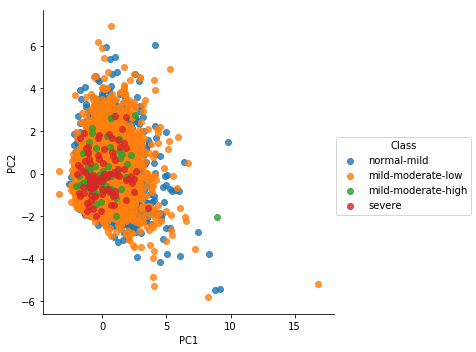

In [35]:
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    #plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

#y = df_esrdonly[' ESRD patients: Total (or %) deaths for target year']
#y = np.std(pca.transform(standardisedX), axis=0)**2

plt.rcParams['figure.figsize'] = 12, 12
pca_scatter(pca, standardisedX, y)

In [36]:
#plt.title('Only two components can separate the mortality data. True = High ')
#plt.savefig('pca_components_separating_high_low_mortality' + '.png')            

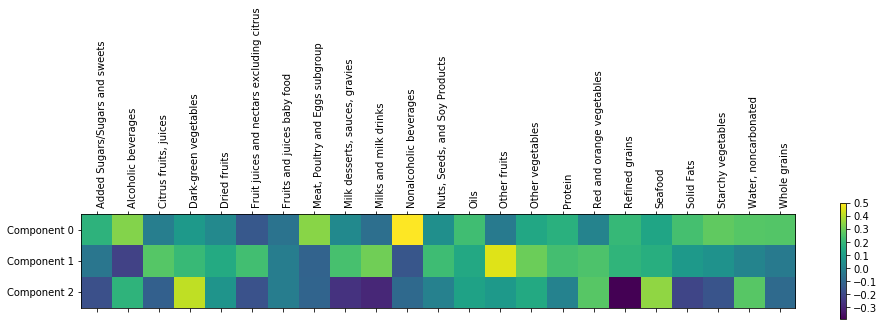

In [37]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 3

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca.columns)), df_drop_pca.columns, rotation=90, ha='left')
plt.show()# 


In [38]:

# Negative: Refined grain, Milk drink, solid fat    
    


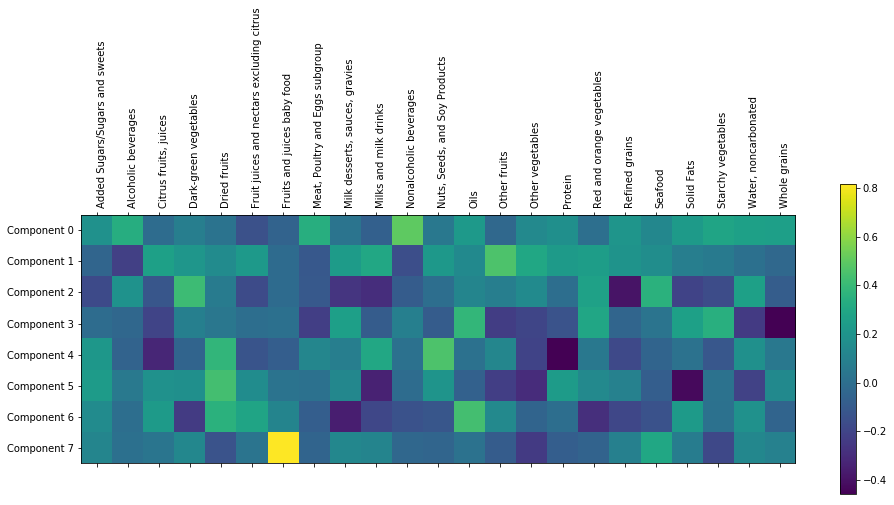

In [39]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 8

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_drop_pca.columns)), df_drop_pca.columns, rotation=90, ha='left')
plt.show()# 



From 3 components:
Non alc, other fruit, dark green
alc, seafood, milk

---

1st component:Non alcoholic, Meat, Alcoholic, starchy vegetable, :   water, whole grain, solid fat, protein 
2nd Component: Other fruits, milks,         
3rd component: Dark Green, Seafood

From 7 components:
Fruit and Juices, non alc, nuts, oils, other fruits, meat, alc, dark v
protein, refined, whole grain, fat


# selection for regression

In [40]:
regression_variables = merged[ 
    
       [
    
       #'Added Sugars/Sugars and sweets', : 
       'Alcoholic beverages',
       #'Citrus fruits, juices', 
       'Dark-green vegetables', 
       #'Dried fruits',
       #'Fruit juices and nectars excluding citrus',
       'Fruits and juices baby food', 
       'Meat, Poultry and Eggs subgroup',
       'Milk desserts, sauces, gravies', 
       'Milks and milk drinks ',
       'Nonalcoholic beverages', 
       'Nuts, Seeds, and Soy Products', 'Oils',
       'Other fruits', 
       #'Other vegetables', 
       'Protein',
       #'Red and orange vegetables', 
       'Refined grains', 
       'Seafood', 
       'Solid Fats',
       'Starchy vegetables', 
       'Water, noncarbonated', 
       'Whole grains',
       #'participant_age', 
       #'gender', 
       'acr', 
       'kidney_failed',
       'systolic_pressure', 
       'diastolic_pressure'
       ]
]           


In [41]:
regression_variables.corr()

,Alcoholic beverages,Dark-green vegetables,Fruits and juices baby food,"Meat, Poultry and Eggs subgroup","Milk desserts, sauces, gravies",Milks and milk drinks,Nonalcoholic beverages,"Nuts, Seeds, and Soy Products",Oils,Other fruits,Protein,Refined grains,Seafood,Solid Fats,Starchy vegetables,"Water, noncarbonated",Whole grains,acr,kidney_failed,systolic_pressure,diastolic_pressure
Alcoholic beverages,1.000000,0.187177,NaN,0.134746,0.132129,0.152611,0.157242,0.186868,0.071647,0.065236,0.024026,0.039445,0.238949,0.036518,0.047324,0.111661,0.100610,0.087395,-0.034491,0.066955,0.099416
Dark-green vegetables,0.187177,1.000000,1.000000,0.071935,0.173979,-0.005985,0.113863,0.172566,-0.015109,0.052067,0.072349,0.018804,0.107679,0.038075,0.034308,0.045892,0.138640,-0.026733,-0.060140,0.068595,0.042157
Fruits and juices baby food,NaN,1.000000,1.000000,-0.120457,-0.530756,-0.217494,-0.061247,-1.000000,1.000000,-0.324707,0.533189,0.442974,NaN,-0.209956,0.351660,0.255965,-0.047687,-0.039576,1.000000,0.316261,-0.803754
"Meat, Poultry and Eggs subgroup",0.134746,0.071935,-0.120457,1.000000,0.081594,0.111060,0.169771,0.090673,0.131803,0.062527,0.096372,0.104079,0.107927,0.096537,0.085180,0.095116,0.178584,0.002050,-0.014742,0.011514,0.041578
"Milk desserts, sauces, gravies",0.132129,0.173979,-0.530756,0.081594,1.000000,0.114556,0.152080,0.120211,0.118149,0.069154,0.116896,0.130145,0.137461,0.062646,0.076894,0.050758,0.054203,0.221443,-0.055016,0.053388,0.034799
Milks and milk drinks,0.152611,-0.005985,-0.217494,0.111060,0.114556,1.000000,0.129620,0.118418,0.072542,0.089645,0.101471,0.110795,0.117047,0.091649,0.084128,0.105564,0.126495,-0.009034,0.009454,-0.057462,-0.010531
Nonalcoholic beverages,0.157242,0.113863,-0.061247,0.169771,0.152080,0.129620,1.000000,0.068119,0.151161,0.072395,0.101497,0.095238,0.132288,0.158532,0.133339,0.162266,0.147700,0.012195,-0.006531,0.054202,0.114803
"Nuts, Seeds, and Soy Products",0.186868,0.172566,-1.000000,0.090673,0.120211,0.118418,0.068119,1.000000,0.021234,0.120933,0.086062,0.069884,0.061894,0.026610,0.047170,0.030662,0.130575,0.046856,0.008138,-0.047668,-0.048860
Oils,0.071647,-0.015109,1.000000,0.131803,0.118149,0.072542,0.151161,0.021234,1.000000,0.047714,0.039008,0.073935,0.151261,0.121513,0.116711,0.062351,0.114780,-0.005584,-0.003397,-0.003804,0.032528
Other fruits,0.065236,0.052067,-0.324707,0.062527,0.069154,0.089645,0.072395,0.120933,0.047714,1.000000,0.095475,0.069597,0.116063,0.033472,0.070955,0.103938,0.083025,-0.019890,-0.025321,-0.001047,0.050800


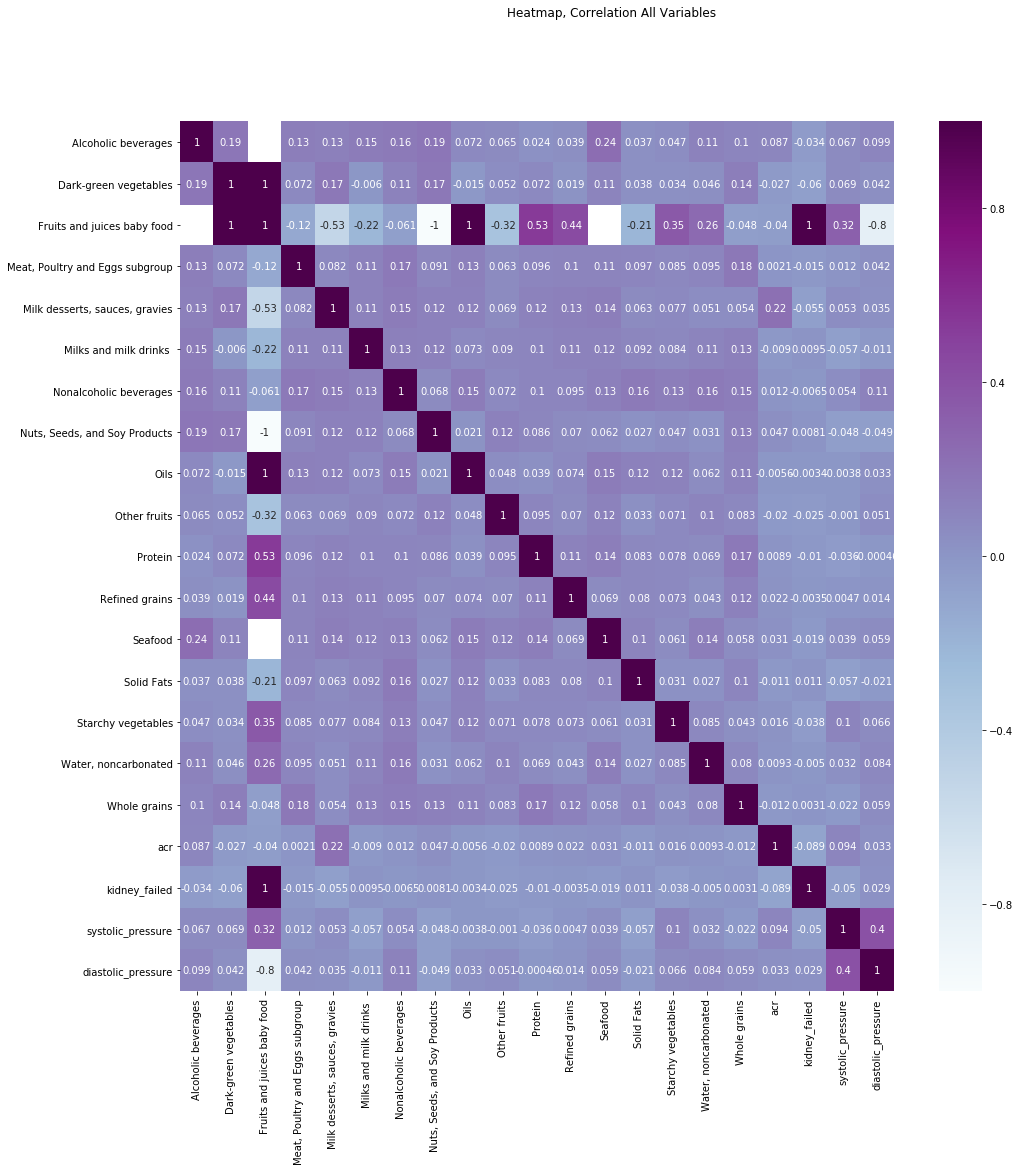

In [42]:
plt.figure(figsize=(16, 16))

corr = regression_variables.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           cmap="BuPu");
plt.suptitle('Heatmap, Correlation All Variables');
plt.savefig('./images/regression_food_subgroup_and_acr.png')

Affecting:
ACR: Milk dessert, meat and Poultry, Alcohol, High Blood Pressure related
Kidney failed: dark green vegetable, Milk Dessert

# Code below are not part of methodology and experiment part

In [43]:
# The above plot kind of shows the correlation with CKD and ACR
df_drop_pca.columns

Index(['Added Sugars/Sugars and sweets', 'Alcoholic beverages',
       'Citrus fruits, juices', 'Dark-green vegetables', 'Dried fruits',
       'Fruit juices and nectars excluding citrus',
       'Fruits and juices baby food', 'Meat, Poultry and Eggs subgroup',
       'Milk desserts, sauces, gravies', 'Milks and milk drinks ',
       'Nonalcoholic beverages', 'Nuts, Seeds, and Soy Products', 'Oils',
       'Other fruits', 'Other vegetables', 'Protein',
       'Red and orange vegetables', 'Refined grains', 'Seafood', 'Solid Fats',
       'Starchy vegetables', 'Water, noncarbonated', 'Whole grains'],
      dtype='object')

In [44]:
df_drop_pca_important = df_drop_pca[
    
    
    [  'Dairy', 'Fats, oils, and salad dressings', 'Fruits', 'Grains',
       'Protein', 'Sugars, sweets, and beverages', 'Vegetables',
       'participant_age', 'gender', 
       #'age_from_recom_amount',
       #'avg_taken_from_recom_amount', 
       #'recommended_low', 
       #'recommended_high',
       'acr', 
       'kidney_failed', 'systolic_pressure', 'diastolic_pressure',
       'calorie', 'protein', 'sodium', 'carbohydrate', 'sugar', 'fibre', 'fat',
       'saturated_fat', 'mono_fat', 'poly_fat', 'cholesterol', 'calcium',
       'phosphorous', 'magnesium', 'potassium', 'alcohol',
       #'a_sample_food_code', 
       'albumin_urine_mu_g', 'albumin_urine_mg',
       'creatinine_mu_mol', 'creatinine_mg', 
        #'received_dialysis_in_12_months',
       'kidney_stones', 'passed_kidney_stones_12_months',
       'urinary_leakage_frequency', 'urine_lose_each_time',
       'leak_during_activities', 'how_frequent_leak_occurs',
       'urinated_before_reaching_toilet', 'how_frequent',
       'leak_during_nonphysical_activities', 'how_frequest_leak_nonphysical',
       'how_much_leak_bothering', 'how_much_daily_activities_affected'
       'count_night_time_urinate'
    ]
    
]

KeyError: "['Dairy' 'Fats, oils, and salad dressings' 'Fruits' 'Grains'\n 'Sugars, sweets, and beverages' 'Vegetables' 'participant_age' 'gender'\n 'acr' 'kidney_failed' 'systolic_pressure' 'diastolic_pressure' 'calorie'\n 'protein' 'sodium' 'carbohydrate' 'sugar' 'fibre' 'fat' 'saturated_fat'\n 'mono_fat' 'poly_fat' 'cholesterol' 'calcium' 'phosphorous' 'magnesium'\n 'potassium' 'alcohol' 'albumin_urine_mu_g' 'albumin_urine_mg'\n 'creatinine_mu_mol' 'creatinine_mg' 'kidney_stones'\n 'passed_kidney_stones_12_months' 'urinary_leakage_frequency'\n 'urine_lose_each_time' 'leak_during_activities'\n 'how_frequent_leak_occurs' 'urinated_before_reaching_toilet'\n 'how_frequent' 'leak_during_nonphysical_activities'\n 'how_frequest_leak_nonphysical' 'how_much_leak_bothering'\n 'how_much_daily_activities_affectedcount_night_time_urinate'] not in index"

In [ ]:
df_drop_pca_important.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_drop_pca_important.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation All Variables');

#  Will Check on Actual Taken Amount Only ####
# age_from and age_to can be removed

In [45]:
df = pd.read_csv(data_folder + 'no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
# df = df.drop([ 'age_from', 'age_to' ], axis=1)
df.head()

FileNotFoundError: File b'./data-for-code/no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv' does not exist

In [ ]:
df.describe()

In [ ]:
#find correlation with price after standardization
df.corr()

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	1.000000	0.828148	0.999315	0.864052


ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.828148	1.000000	0.847294	0.995676
Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.999315	0.847294	1.000000	0.880927
Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.864052	0.995676	0.880927	1.000000
    

In [ ]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');


In [ ]:
# Without Age Groups

In [ ]:
df_without_ages = df.drop(['age_from', 'age_to', ' Gender'], axis=1)
df_without_ages.head()

In [ ]:
df_without_ages.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_without_ages.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_actual_intake_amount' + '.png')            

# Will use Normalization all data 

In [ ]:
df = pd.read_csv('no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
df = df.drop([' Gender'], axis=1)
df.head()

In [ ]:
# normalize data
df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()
# df.head()

In [ ]:
df_normalized.corr()

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
ESRD patients: Total (or %) deaths for target year	0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	1.000000	0.828148	0.999315	0.864052
ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.828148	1.000000	0.847294	0.995676
Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.999315	0.847294	1.000000	0.880927
Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.864052	0.995676	0.880927	1.000000                

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Amounts Only');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_normalized_actual_intake_amount' + '.png')            

# Will check only on the difference from average recommended amount

In [ ]:
df = pd.read_csv('copy-only-diff-no-empty-data-diff-recomm-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing .csv')
df.head()

In [ ]:
df.describe()

In [ ]:
# find correlation with price after standardization
df.corr()

age_from	age_to	Actual Vegetable Intake	Actual Protein Intake	Actual Grain Intake	Actual Dairy Intake	Actual Fruit intakes	Actual Taken Sugars sweets and beverages amount	Avg Fats oils and salad dressings taken	Diff Vegetable	diff protein	diff grain	diff dairy	diff fruit	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
                ESRD patients: Total (or %) deaths for target year	
                
                
 0.907545	0.907790	0.606775	0.040950	-0.452625	-0.408543	-0.372665	0.178760	-0.081677	0.426499	-0.273596	-0.268453	-0.364665	-0.488155	1.000000	0.828148	0.999315	0.864052

ESRD patients: Avg. Annual Mortality rates	0.854841	0.854759	0.444925	-0.151035	-0.572187	-0.238108	-0.369639	0.022898	-0.202818	0.359590	-0.266776	-0.263227	-0.213864	-0.392090	0.828148	1.000000	0.847294	0.995676


Dialysis patients: Total (or %) deaths for target year	0.914524	0.914723	0.603179	0.031982	-0.462540	-0.404490	-0.375241	0.172767	-0.087055	0.424340	-0.278817	-0.272938	-0.362140	-0.489873	0.999315	0.847294	1.000000	0.880927


Dialysis patients: Avg. Annual Mortality rates	0.878659	0.879439	0.480531	-0.134234	-0.580723	-0.264096	-0.370520	0.050212	-0.208805	0.401294	-0.244088	-0.246893	-0.229239	-0.387759	0.864052	0.995676	0.880927	1.000000
    
                

In [ ]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Variables, and Difference from Recommended Intake Variables');

In [ ]:
df.head()
df = df.drop([' Gender'], axis=1)
df.head()

In [ ]:
# normalize data

df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()
#df.head()

In [ ]:
df_normalized.corr()

In [ ]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.suptitle('Heatmap, Correlation Actual Intake Variables, and Difference from Recommended Intake Variables');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/univariate_food_groups_heatmaps_diff_intake_amount_normalized' + '.png')            

# Bivariate

# The most important for Bivariate: bivariate_diff_norm.png and bivariate_diff_norm_rate_only.png. Difference in intake amounts from recommended, also normalized.



Bivariate plots on actual amount intake and target variables. will be saved in bivariate.png. The correlation pattern can be checked in the image saved

Correlation within the intake amounts do not say much as we are using actual intake amounts not differences with recomended amount. Also because, higher aged people will take higher amount. Also, normalized data will give true relation.

The correlation was shown above. Now linearity and non-linearity can be seen using the Bivariate plots. 

The plots show similarity with correlation

In [ ]:
import numpy as np 
import pandas as pd 

from IPython.display import display, HTML

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline

# ref in ref section

# On Actual intake Amounts

In [ ]:
df = pd.read_csv('no-empty-data-only-actual-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing.csv')
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_actual = df.drop([' Gender', 'age_from', 'age_to'], axis=1)
df_actual.head()

In [ ]:
# on actual amounts
#plt.figure(figsize=(16, 300))
sns.pairplot(df_actual,   vars=df_actual.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_food_group' + '.png')            
plt.show()

# On difference from recommended amount (data not normalized)

In [ ]:
df = pd.read_csv('copy-only-diff-no-actual-no-empty-cell-diff-recomm-mortality_recom_added_group_data_june_9th_gender_based_data_after_processing .csv')
df.head()

In [ ]:
# On difference from recommended amount (data not normalized)

#df_actual_diff = df.drop(['age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual_diff.head()
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
#df_actual = df.drop([' Gender', 'age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_actual_diff = df.drop(['age_from', 'age_to'], axis=1)
df_actual_diff.head()
#df.head()

In [ ]:
# On difference from recommended amount (data not normalized)

sns.pairplot(df_actual_diff,   vars=df_actual_diff.columns, size=5, kind='reg'); 
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
#plt.savefig('./saved_images_from_visualizations/' + 'line_' +indicator.replace(' ', '_')[0:10] + '_' + str(np.random.randint(0, 99999)) + '.png')            
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff' + '.png')            
plt.show()


# On difference from recommended amount (data/diff normalized)

In [ ]:
df_normalized_diff = (df_actual_diff - df_actual_diff.mean())/ (df_actual_diff.max() - df_actual_diff.min())
df_normalized_diff.head()

sns.pairplot(df_normalized_diff,   vars=df_normalized_diff.columns, size=5, kind='reg', aspect=1); # diag_kind='kde',
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable');
#plt.savefig('./saved_images_from_visualizations/' + 'line_' +indicator.replace(' ', '_')[0:10] + '_' + str(np.random.randint(0, 99999)) + '.png')            
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff_norm' + '.png')            
plt.show()


In [ ]:
df_normalized_diff = df_normalized_diff.drop([' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates'], axis=1)
df_normalized_diff.head()

In [ ]:
sns.pairplot(df_normalized_diff,   vars=df_normalized_diff.columns, size=5, kind='reg', aspect=1); # diag_kind='kde',
plt.suptitle('Bivariate : Diff : Food Group: Normalized\n')
plt.ylabel('Difference in Intake amount from Recommended : Normalized')
plt.xlabel('Intakes')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_diff_norm_rate_only' + '.png')            
plt.show()

In [ ]:
# can be ignored
"""
df_esrdonly = df.drop(['age_from', 'age_to',' ESRD patients: Avg. Annual Mortality rates', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_esrdonly.head()

plt.figure(figsize=(14, 14))
sns.pairplot(df_esrdonly, diag_kind='kde');
plt.xlabel('Bivariate Plot, Difference from Recommended Variables, Total ESRD target variable');

#plt.figure(figsize=(16, 16))
plt.rcParams['figure.figsize'] = 16, 16
pd.plotting.scatter_matrix(df_esrdonly, diagonal="kde")
plt.suptitle('Scatter Matrix');
plt.show();
"""

# PCA

Applying PCA on Difference data

In [ ]:
df_esrdonly = df.drop(['age_from', 'age_to',' ESRD patients: Total (or %) deaths for target year', ' Dialysis patients: Total (or %) deaths for target year', ' Dialysis patients: Avg. Annual Mortality rates' ], axis=1)
df_esrdonly.head()
#df_esrdonly.head()

In [ ]:
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

import sklearn 
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_esrdonly)
standardisedX = pd.DataFrame(standardisedX, index=df_esrdonly.index, columns=df_esrdonly.columns)
standardisedX.apply(np.mean)

In [ ]:
standardisedX.apply(np.std)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

In [ ]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary


In [ ]:
summary = pca_summary(pca, standardisedX)

In [ ]:
# First two component can define over 95% 

In [ ]:
np.sum(summary.sdev**2)

In [ ]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
plt.rcParams['figure.figsize'] = 8, 8   

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            
    plt.show()



screeplot(pca, standardisedX)
#plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            

In [ ]:
# comp 2 to comp 3 is the most change - slope
# first two or at best first 3 can be retained

In [ ]:
summary.sdev**2

Can be retained

PC1	4.263124
PC2	1.449435


In [ ]:
pca.components_[0]

In [ ]:
np.sum(pca.components_[0]**2)

In [ ]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [ ]:
calcpc(standardisedX, pca.components_[0])

In [ ]:
pca.transform(standardisedX)[:, 0]

In [ ]:
pca.components_[1]

In [ ]:
np.sum(pca.components_[1]**2)

highest loadings for

In [ ]:
# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work

In [ ]:
df_esrdonly[' ESRD patients: Avg. Annual Mortality rates']
sorted(standardisedX[' ESRD patients: Avg. Annual Mortality rates'])

In [ ]:
# Define high and low mortality

In [ ]:
y = df_esrdonly[' ESRD patients: Avg. Annual Mortality rates'] #< 0.5
# from normalized data. > 0.5 = high mortality
print('as the older age show higher mortality, does it mean th')
y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
y = standardisedX[' ESRD patients: Avg. Annual Mortality rates'] > 0.5
y


In [ ]:
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    #plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

#y = df_esrdonly[' ESRD patients: Total (or %) deaths for target year']
#y = np.std(pca.transform(standardisedX), axis=0)**2
pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

# plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');
plt.title('Only two components can separate the mortality data. True = High ')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            


In [ ]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
#plt.xticks(range(1, len(df_esrdonly.columns)),df_esrdonly.columns[1:len(df_esrdonly.columns)],rotation=65)
plt.xticks(range(len(df_esrdonly.columns)),df_esrdonly.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_what_contributes_to_PCA_components' + '.png')            
plt.show()# 

In [ ]:
# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

# How the intake differences contributed for the affecting PCA components

In [ ]:
diffs = list(df_esrdonly.columns[:-1]) 
import seaborn as sns
s = sns.heatmap(df_esrdonly[diffs].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_how_in_together_influencing_PCA_components' + '.png')            
plt.show()

Vegetable by itself is important - contributing factors

protein + grain + then fruit

grain with fruit -- slighly with dairy

dairy with protein and grain*

fruit with protein and grain then dairy


# References

https://www.kaggle.com/etakla/exploring-the-dataset-univariate-analysis
https://www.kaggle.com/etakla/exploring-the-dataset-bivariate-analysis
https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
https://lifelines.readthedocs.io/en/latest/
https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html
https://www.statsdirect.com/help/survival_analysis/cox_regression.htm
https://courses.lumenlearning.com/suny-natural-resources-biometrics/chapter/chapter-7-correlation-and-simple-linear-regression/
https://www.kaggle.com/residentmario/univariate-plotting-with-pandas

#ref https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
#



https://www.pearsonhighered.com/gould-statistics-2e-info/assets/pdf/sample-chapter-ess-ch04.pdf
    
https://www.kaggle.com/amanajmera1/linear-regression-model-on-nba-dataset
    
https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/ch04.html
    
http://sites.utexas.edu/sos/guided/inferential/numeric/bivariate/cor/
    
https://www.graphpad.com/support/faq/what-is-the-difference-between-correlation-and-linear-regression/
    
    
https://www.statsdirect.com/help/regression_and_correlation/simple_linear.htm
    
    
https://erc.barnard.edu/spss/pearsons_r
    
    
https://www.statpac.com/statistics-calculator/correlation-regression.htm
    
https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/
    
https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression
    
https://www.statisticssolutions.com/bivariate-correlation/
    
https://data-flair.training/blogs/python-statistics/
    

https://www.kaggle.com/naina04/bivariate-plotting-with-pandas
    
https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751
    
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
    
https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
    
https://www.kaggle.com/residentmario/univariate-plotting-with-pandas
    
    

# References:
    
Number of columns to display    
https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html


# Misc to help with Regression

In [ ]:
#folder = './data-for-code/' #'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/acr-data-for-analysis/food-groups/' #/regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
#os.listdir(folder)

In [ ]:
file = data_folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
#excel_file = pd.ExcelFile(folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx')
file


In [ ]:
excel_file = pd.ExcelFile(file)
# see all sheet names
sheet_names = excel_file.sheet_names  
sheet_names#[:4]


In [ ]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

foodgroup_acr_data_df = excel_file.parse('consolidated-food-group-acr')
foodgroup_acr_data_df.head(3)

In [ ]:
df_food_group_only = foodgroup_acr_data_df[ ['participant_id',  'food_group_name', 'avg_food_weight_in_gms'] ]
df_food_group_only.head()

In [ ]:
df_food_group_only.T

In [ ]:
df_food_group_only_index = df_food_group_only.set_index(['participant_id', 'food_group_name'])
df_food_group_only_index

In [ ]:
df_food_group_only_index_unstack = df_food_group_only_index.unstack()

In [ ]:
df_food_group_only_index_unstack.head()

In [ ]:
foodgroup_acr_data_df.columns

In [ ]:
df_without_food_groups = foodgroup_acr_data_df.drop(['food_group_name', 'avg_food_weight_in_gms'], axis=1)
df_without_food_groups.head()

In [ ]:
df_without_food_groups_one_entry = df_without_food_groups.groupby(['participant_id']).mean()

In [ ]:
merged = df_food_group_only_index_unstack.merge(df_without_food_groups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape

In [ ]:
merged.head()

In [ ]:
foodgroup_acr_data_df_t = foodgroup_acr_data_df.T
foodgroup_acr_data_df_t.head(10)

In [ ]:
df_multi = foodgroup_acr_data_df.set_index(['participant_id', 'food_group_name'])
df_multi


In [ ]:
df_multi = df_multi.unstack()

In [ ]:
df_multi.head()

In [ ]:
df_some = foodgroup_acr_data_df[['participant_id', 'participant_age']]
df_some.head()

In [ ]:
df_some.merge(df_multi, how='left', left_on='participant_id', right_on='participant_id')

In [ ]:
Ref: https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77
        

In [ ]:
# backup

#folder = './data-for-code/' #'C:/Users/Sayed Ahmed/mrp_project_implementation/phase methodology and experiments/excel-xlstat-analysis/acr-data-for-analysis/food-groups/' #/regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
#os.listdir(folder)

file = data_folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx'
#excel_file = pd.ExcelFile(folder + 'regression_consolidated-food-group-based-data-with-acr-and-blood-pressure-2015-2016.xlsx')
file


excel_file = pd.ExcelFile(file)
# see all sheet names
sheet_names = excel_file.sheet_names  
sheet_names#[:4]


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)

foodgroup_acr_data_df = excel_file.parse('consolidated-food-group-acr')
foodgroup_acr_data_df.head(3)


df_food_group_only = foodgroup_acr_data_df[ ['participant_id',  'food_group_name', 'avg_food_weight_in_gms'] ]
df_food_group_only.head()

df_food_group_only.T

df_food_group_only_index = df_food_group_only.set_index(['participant_id', 'food_group_name'])
df_food_group_only_index

df_food_group_only_index_unstack = df_food_group_only_index.unstack()

df_food_group_only_index_unstack.head()

foodgroup_acr_data_df.columns

df_without_food_groups = foodgroup_acr_data_df.drop(['food_group_name', 'avg_food_weight_in_gms'], axis=1)
df_without_food_groups.head()

df_without_food_groups_one_entry = df_without_food_groups.groupby(['participant_id']).mean()

merged = df_food_group_only_index_unstack.merge(df_without_food_groups_one_entry,  how='inner', left_on='participant_id', right_on='participant_id', left_index=True)
merged.head()
merged.shape

merged.head()

merged.to_csv(data_folder + 'food_group_data_ready_for_excel_regression.csv')


foodgroup_acr_data_df_t = foodgroup_acr_data_df.T
foodgroup_acr_data_df_t.head(10)




In [ ]:
https://hackernoon.com/reshaping-data-in-python-fa27dda2ff77
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html    